Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[['high' 'low' '4' 'more' 'small' 'high']
 ['low' 'low' '2' '2' 'big' 'high']
 ['med' 'high' '2' '2' 'med' 'high']
 ...
 ['vhigh' 'med' '2' '4' 'small' 'high']
 ['high' 'med' '4' '4' 'small' 'high']
 ['med' 'vhigh' '3' '4' 'big' 'low']] ['acc' 'unacc' 'unacc' ... 'acc' 'acc' 'unacc']
[[0 1 2 2 2 0]
 [1 1 0 0 0 0]
 [2 0 0 0 1 0]
 ...
 [3 2 0 1 2 0]
 [0 2 2 1 2 0]
 [2 3 1 1 0 1]] [0 2 2 ... 0 0 2]
Training Time In m Second 0.8664131164550781 2.025127410888672 0.7987022399902344 2.0182132720947266
Prediction Time In m Second 19.451618194580078 22.93872833251953 20.844221115112305 24.503469467163086


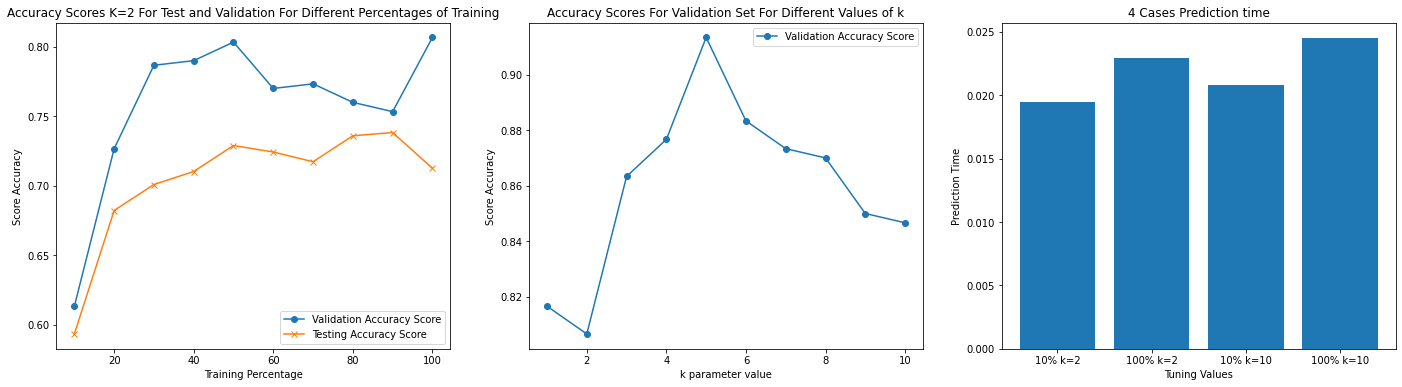

In [ ]:
import numpy as np #for math
import matplotlib.pyplot as plt #to plot
import pandas as pd #to import datasets and manage them
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import time
#importing datasets
#from google drive

def knn_tuning(k,training_percentage,xtrain,ytrain,xvalidate,yvalidate,xtest,ytest,metric):
  X_t=xtrain[0:(10*training_percentage),:]
  y_t=ytrain[0:(10*training_percentage)]

  knn = KNeighborsClassifier(n_neighbors=k, metric = metric ) #metric euclidean or "manhattan" or default='minkowski'
  t_train=time.time()
  knn.fit(X_t, y_t)
  t_predict_test=time.time()
  y_pred_test = knn.predict(xtest)
  t_end=time.time()
  y_pred_validate = knn.predict(xvalidate)

  y_p_test=accuracy_score(ytest, y_pred_test)
  y_p_validate=accuracy_score(yvalidate, y_pred_validate)
  return [y_p_validate,y_p_test,(t_predict_test-t_train),(t_end-t_predict_test)]

from google.colab import drive
drive.mount('/content/drive/')

data_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/car_evaluation.csv')
X = np.array(data_set.iloc[ : , 0:6 ])
y = np.array(data_set.iloc[ : , 6 ])
#print(X,y)
#Shuffling Data
X, y = shuffle(X, y, random_state=6)
print(X,y)

le = preprocessing.LabelEncoder()
for i in range(6):
  le.fit(X[:,i])
  X[:,i]=le.transform(X[:,i])

le.fit(y)
y=le.transform(y)
print(X,y)
#Splitting Data

X_train=X[0:1000 , :]
y_train=y[0:1000]
#print("Here",X_train,y_train)
#Validation
X_val = X[1000:1300,:]
y_val = y[1000:1300]
#Testing
X_test=X[1300:1728,:]
y_test=y[1300:1728]


#Problem (3) (C) 
y_p_val=[]
y_p_test=[]
for i in range(1,11):
  y_p_val.append(knn_tuning(2,i*10,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[0])
  y_p_test.append(knn_tuning(2,i*10,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[1])
Percentage = np.linspace(10, 100, 10, dtype=np.int32)

plt.figure().set_size_inches(24, 6)
plt.subplot(1,3,1)
plt.plot(Percentage, y_p_val, marker="o",label="Validation Accuracy Score")
plt.plot(Percentage, y_p_test, marker="x",label="Testing Accuracy Score")
plt.ylabel("Score Accuracy")
plt.xlabel("Training Percentage")
plt.title("Accuracy Scores K=2 For Test and Validation For Different Percentages of Training")
plt.legend()
#plt.show()

#Problem (3) (D) 
y_p_val_k=[]
for i in range(1,11):
  y_p_val_k.append(knn_tuning(i,100,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[0])

k_values = np.linspace(1, 10, 10, dtype=np.int32)
plt.subplot(1,3,2)
#plt.figure().set_size_inches(8, 6)
plt.plot(k_values , y_p_val_k, marker="o",label="Validation Accuracy Score")
plt.ylabel("Score Accuracy")
plt.xlabel("k parameter value")
plt.title("Accuracy Scores For Validation Set For Different Values of k")
plt.legend()
#plt.show()

#Problem (3) (e) 
t_t0,t_p0=knn_tuning(2,10,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[2:]
t_t1,t_p1=knn_tuning(2,100,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[2:]
t_t2,t_p2=knn_tuning(10,10,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[2:]
t_t3,t_p3=knn_tuning(10,100,X_train,y_train,X_val,y_val,X_test,y_test,'euclidean')[2:]

print("Training Time In m Second",t_t0*1000,t_t1*1000,t_t2*1000,t_t3*1000)
print("Prediction Time In m Second",t_p0*1000,t_p1*1000,t_p2*1000,t_p3*1000)

x=['10% k=2','100% k=2','10% k=10','100% k=10']
#plt.figure().set_size_inches(8, 6)
plt.subplot(1,3,3)
plt.bar(x,[t_p0,t_p1,t_p2,t_p3])
plt.ylabel("Prediction Time")
plt.xlabel("Tuning Values")
plt.title("4 Cases Prediction time")
plt.show()